In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
data = pd.read_csv("/content/spam.csv", encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [6]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]
    return ' '.join(words)

data['cleaned'] = data['message'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['cleaned'])
y = data['label']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [11]:
y_pred = model.predict(X_test)


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.979372197309417
[[964   1]
 [ 22 128]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [13]:
sample = ["Congratulations! You won a free lottery prize"]
sample_clean = vectorizer.transform(sample)
prediction = model.predict(sample_clean)

if prediction[0] == 1:
    print("Spam Email")
else:
    print("Not Spam")


Spam Email


In [14]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[964   1]
 [ 22 128]]


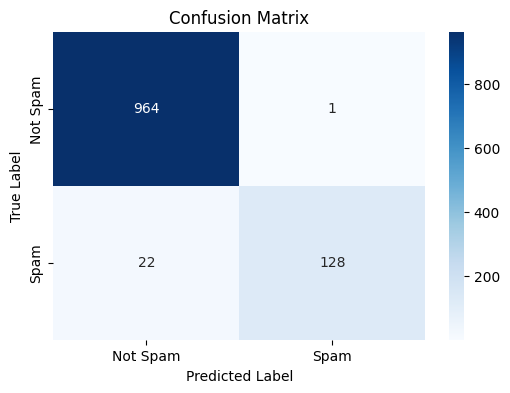

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
